In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
ulr = ('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')

In [3]:
df = pd.read_csv(ulr, delimiter=",")

In [4]:
# summarize the data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# Feature Matrix
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = df["Drug"]

In [8]:
from sklearn.model_selection import train_test_split

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<div id="prediction">

## Prediction

In [12]:
predTree = drugTree.predict(X_testset)

## Evaluation

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [18]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1done

## Package Plan ##

  environment location: C:\Users\Lien Tran\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_0         148 KB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
     

 Visualization

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Lien Tran\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
dot_data = StringIO()
export_graphviz(drugTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

[Text(209.25, 195.696, 'X[4] <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(167.4, 152.208, 'X[2] <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(83.7, 108.72, 'X[0] <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(41.85, 65.232, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(125.55000000000001, 65.232, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(209.25, 65.232, 'X[2] <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(167.4, 21.744, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(251.10000000000002, 21.744, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(292.95, 65.232, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(251.10000000000002, 152.208, 'entropy = 0.0\nsamples = 69\nvalue = [0, 

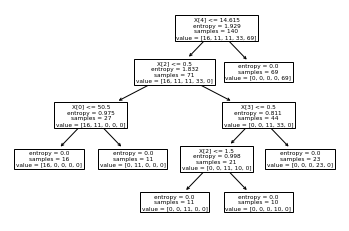

In [47]:
tree.plot_tree(drugTree)